<h1>Data Analyst: Hernandez, Rina Rose M.</h1>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
terror = pd.read_csv('Global_terrorist.csv', encoding='ISO-8859-1')

In [4]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
filtered_df = terror[terror['region_txt'] == 'Middle East & North Africa']

# Filter by year (e.g., incidents after 2000)
filtered_df = filtered_df[filtered_df['iyear'] >= 2000]

# Filter by attack type (e.g., bombings)
filtered_df = filtered_df[filtered_df['attacktype1_txt'] == 'Bombing/Explosion']

# Filter by significant impact (e.g., incidents with at least 10 fatalities)
filtered_df = filtered_df[filtered_df['nkill'] >= 10]

print(f"Filtered dataset size: {len(filtered_df)} rows")

Filtered dataset size: 1737 rows


In [6]:
import folium
from folium.plugins import HeatMap

# Aggregate incidents by latitude and longitude
aggregated_df = filtered_df.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

print(aggregated_df.head())

    latitude  longitude  incident_count
0  12.743795  44.843678               1
1  12.760069  44.890266               1
2  12.825647  44.846416              12
3  12.832581  45.027071               1
4  12.867085  44.981911               6


<h1> Visualizing GEOSPATIAL WITH FOLIUM LIbrary </h1>

In [7]:


# filtered_df = df[(df['region_txt'] == 'Middle East & North Africa') & (df['iyear'] >= 2000)]

# Aggregate incidents by location
aggregated_df = filtered_df.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

# # Normalize weights (optional)
aggregated_df['normalized_weight'] = (aggregated_df['incident_count'] - aggregated_df['incident_count'].min()) / \
                                (aggregated_df['incident_count'].max() - aggregated_df['incident_count'].min())

# Prepare heat_data
heat_data = aggregated_df[['latitude', 'longitude', 'normalized_weight']].values.tolist()

# Create a base map
m = folium.Map(location=[30, 40], zoom_start=4)

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
m.save('terrorism_heatmap.html')
m

In [8]:
aggregated_df

,latitude,longitude,incident_count,normalized_weight
0,12.743795,44.843678,1,0.000000
1,12.760069,44.890266,1,0.000000
2,12.825647,44.846416,12,0.028061
3,12.832581,45.027071,1,0.000000
4,12.867085,44.981911,6,0.012755
...,...,...,...,...
517,38.720489,35.482597,1,0.000000
518,39.798509,32.805613,1,0.000000
519,39.916839,44.044637,1,0.000000
520,39.930771,32.767540,3,0.005102


In [9]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<h1>REGIONAL ANALYSIS </h1>

<h1>#1: Which region has the highest frequency of long-lasting terrorist incidents?</h1>

In [10]:
extended_df = terror[terror['extended'] == 1]
extended_counts = extended_df['region_txt'].value_counts()

extended_counts_df = extended_counts.reset_index()
extended_counts_df.columns = ['Region', 'Extended_Incidents']

In [11]:
extended_counts_df

,Region,Extended_Incidents
0,South Asia,2516
1,Middle East & North Africa,2065
2,Sub-Saharan Africa,1692
3,South America,816
4,Southeast Asia,544
5,Eastern Europe,197
6,Western Europe,150
7,Central America & Caribbean,150
8,North America,54
9,Central Asia,37


<h2>Insight: South Asia has the highest frequency of incident</h2>

In [12]:
regional_filter = terror[(terror['iyear'] >= 1970) &
                    (terror['attacktype1_txt'] == 'Bombing/Explosion' ) &
                    (terror['region_txt'] == 'North America')]
aggregated_df = regional_filter.groupby(['latitude', 'longitude']).size().reset_index(name= 'incident_count')

# Step 2
aggregated_df['normalize_weight'] = (aggregated_df['incident_count'] - aggregated_df['incident_count'].min()) / \
                                    (aggregated_df['incident_count'].max() - aggregated_df['incident_count'].min())

# Step 3
heat_data = aggregated_df[['latitude', 'longitude', 'incident_count']].values.tolist()

# Step 4
mape = folium.Map(location=[30, 40], zoom_start=2)

# Step 5
HeatMap(heat_data).add_to(m)

# Step 6
mape.save('regional_terrorism_heatmap.html')

In [13]:
mape

<h1>#2: Region with high requency of casualty in Bombing</h1>

In [14]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [15]:
terror['casualties'] = terror['nkill'].fillna(0) + terror['nwound'].fillna(0)
casualty = terror[terror['casualties'] >= 50]
casualty_counts = casualty['region_txt'].value_counts()

casualty_counts

region_txt
Middle East & North Africa     1078
South Asia                      732
Sub-Saharan Africa              441
Central America & Caribbean     107
Southeast Asia                   89
South America                    79
Western Europe                   70
Eastern Europe                   61
East Asia                        21
North America                    19
Central Asia                      6
Name: count, dtype: int64

In [16]:

bomb = folium.Map(location=[20, 0], zoom_start=2)

heat_data9 = casualty[['latitude', 'longitude']].dropna()
heat_list = heat_data9.values.tolist()

HeatMap(heat_list, radius=8).add_to(bomb)

bomb.save('high_casualty.html')


In [17]:
bomb

<h1>CRIME TYPE ANALYSIS </h1>

In [22]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to casualties
dtypes: float64(56), int64(22), object(58)
memory usage: 188.5+ MB


<h1>#3: What attack type has the highest occurrence per region?Is there a pattern?</h1>

In [25]:
attackCounts = terror.groupby(['region_txt', 'attacktype1_txt']).size().reset_index(name='incident_count')

topAttack= attackCounts.loc[attackCounts.groupby('region_txt')['incident_count'].idxmax()]

In [26]:
topAttack

,region_txt,attacktype1_txt,incident_count
2,Australasia & Oceania,Bombing/Explosion,75
9,Central America & Caribbean,Armed Assault,4361
20,Central Asia,Bombing/Explosion,235
29,East Asia,Bombing/Explosion,330
38,Eastern Europe,Bombing/Explosion,2766
47,Middle East & North Africa,Bombing/Explosion,30908
56,North America,Bombing/Explosion,1534
65,South America,Bombing/Explosion,9039
74,South Asia,Bombing/Explosion,21246
83,Southeast Asia,Bombing/Explosion,4818


In [28]:
heat_data = aggregated_df[['latitude', 'longitude', 'incident_count']].values.tolist()
mapa= folium.Map(location=[30, 0], zoom_start=2)
HeatMap(heat_data).add_to(attack_map)
mapa.save('regional_attack_heatmap.html')

In [29]:
mapa

In [36]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualties
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN,3.0
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN,9.0
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,0.0
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0.0


In [39]:
crime = terror[terror['attacktype1_txt'] == 'Armed Assault']
crime = crime[crime['iyear'] >= 2010]
crime= crime[crime['nkill'] >= 20]
print(f"Filtered dataset size: {len(crime)} rows")

aggre = crime.groupby(['latitude', 'longitude']).size().reset_index(name='Incident Count')
aggre['normalized_weight'] = (aggre['Incident Count'] - aggre['Incident Count'].min()) / \
                                    (aggre['Incident Count'].max() - aggre['Incident Count'].min())

heatcrime = aggre[['latitude', 'longitude', 'normalized_weight']].values.tolist()

mapa= folium.Map(location=[20, 0], zoom_start=2)
HeatMap(heatcrime).add_to(mapa)
mapa.save('crime_type_analysis.html')

Filtered dataset size: 462 rows


In [40]:
mapa

<h1>CASUALTY ANALYSIS </h1>

In [21]:
casualties = terror[["iyear","casualties"]].groupby("iyear").sum()
casualties

,casualties
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,974.0
1978,3059.0


In [60]:
casualty_analysis = terror.groupby('attacktype1_txt')['casualties'].sum()
casualty_analysis

attacktype1_txt
Armed Assault                          237663.0
Assassination                           38807.0
Bombing/Explosion                      530007.0
Facility/Infrastructure Attack           7407.0
Hijacking                               20719.0
Hostage Taking (Barricade Incident)      8444.0
Hostage Taking (Kidnapping)             30677.0
Unarmed Assault                         14907.0
Unknown                                 47106.0
Name: casualties, dtype: float64

<h1>Q: The attack type with the highest casualties</h1>

In [62]:
highest_casualties_attack = casualty_analysis.idxmax()
highest_casualties_attack

'Bombing/Explosion'

<h2>Insight: The Bombing and Explosion attack type has the highest casualties </h2>

<h1>Visualization</h1>

In [64]:
regional_casualty_analysis = terror.groupby('region_txt')['casualties'].sum()
regional_casualty_analysis

region_txt
Australasia & Oceania             410.0
Central America & Caribbean     37699.0
Central Asia                     3009.0
East Asia                       10365.0
Eastern Europe                  19460.0
Middle East & North Africa     351950.0
North America                   26447.0
South America                   45553.0
South Asia                     242679.0
Southeast Asia                  41896.0
Sub-Saharan Africa             131243.0
Western Europe                  25026.0
Name: casualties, dtype: float64

In [65]:
regional_casualty_analysis = terror[(terror['iyear'] >= 2000)]
regional_casualty_analysis = regional_casualty_analysis[(regional_casualty_analysis['region_txt'] == 'South Asia') & (regional_casualty_analysis['nwound'] >= 10)]

aggregated_df = regional_casualty_analysis.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

# # Normalize weights (optional)
aggregated_df['normalized_weight'] = (aggregated_df['incident_count'] - aggregated_df['incident_count'].min()) / \
                                (aggregated_df['incident_count'].max() - aggregated_df['incident_count'].min())

# Prepare heat_data
heat_data = aggregated_df[['latitude', 'longitude', 'normalized_weight']].values.tolist()

# Create a base map
mapa = folium.Map(location=[30, 40], zoom_start=4)

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
mapa.save('terrorism_heatmap.html')


In [66]:
mapa

<h1>DEMOGRAPHIC ANALYSIS </h1>

In [45]:
demographic_analysis = terror.groupby('gname')['attacktype1_txt'].value_counts().unstack().fillna(0)
demographic_analysis

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
gname,,,,,,,,,
1 May,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
14 K Triad,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
14 March Coalition,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14th of December Command,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
15th of September Liberation Legion,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
Zulu Miners,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Zuwar al-Imam Rida,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Zviadists,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h1>: The demographic most affected by different attack types</h1>

In [46]:
most_affected_demographic = demographic_analysis.sum(axis=1).idxmax()
most_affected_demographic

'Unknown'

In [48]:
target_filtered = terror[(terror['iyear'] >= 2000) & (terror['region_txt'] == 'South America')]
target_filtered = target_filtered[(target_filtered['targsubtype1_txt'] == 'Police Security Forces/Officers')]
aggregated_df = target_filtered.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

# # Normalize weights (optional)
aggregated_df['normalized_weight'] = (aggregated_df['incident_count'] - aggregated_df['incident_count'].min()) / \
                                (aggregated_df['incident_count'].max() - aggregated_df['incident_count'].min())

# Prepare heat_data
heat_data = aggregated_df[['latitude', 'longitude', 'normalized_weight']].values.tolist()

# Create a base map
mapa = folium.Map(location=[30, 40], zoom_start=4)

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
mapa.save('terrorism_heatmap.html')

In [49]:
mapa

<h1>TARGET ANALYSIS </h1>

In [51]:
target_analysis = terror.groupby('targtype1_txt')['attacktype1_txt'].value_counts().unstack().fillna(0)
target_analysis

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
targtype1_txt,,,,,,,,,
Abortion Related,8.0,9.0,51.0,191.0,0.0,1.0,1.0,2.0,0.0
Airports & Aircraft,104.0,16.0,786.0,95.0,264.0,14.0,18.0,6.0,40.0
Business,2389.0,958.0,12020.0,2989.0,68.0,205.0,1543.0,70.0,427.0
Educational Institution,601.0,360.0,2232.0,602.0,9.0,35.0,348.0,72.0,63.0
Food or Water Supply,42.0,0.0,212.0,38.0,5.0,2.0,7.0,6.0,5.0
Government (Diplomatic),641.0,399.0,1666.0,293.0,27.0,58.0,321.0,34.0,134.0
Government (General),3451.0,5982.0,8214.0,1389.0,20.0,75.0,1604.0,121.0,427.0
Journalists & Media,381.0,749.0,754.0,206.0,3.0,236.0,481.0,49.0,89.0
Maritime,77.0,11.0,134.0,11.0,55.0,3.0,45.0,0.0,15.0


<h1>: The most common target of attacks</h1>

In [53]:
most_common_target = target_analysis.sum(axis=1).idxmax()
most_common_target

'Private Citizens & Property'

<h2>The most common target of attack is PRIVATE CITIZENS AND PROPERTY</h2>

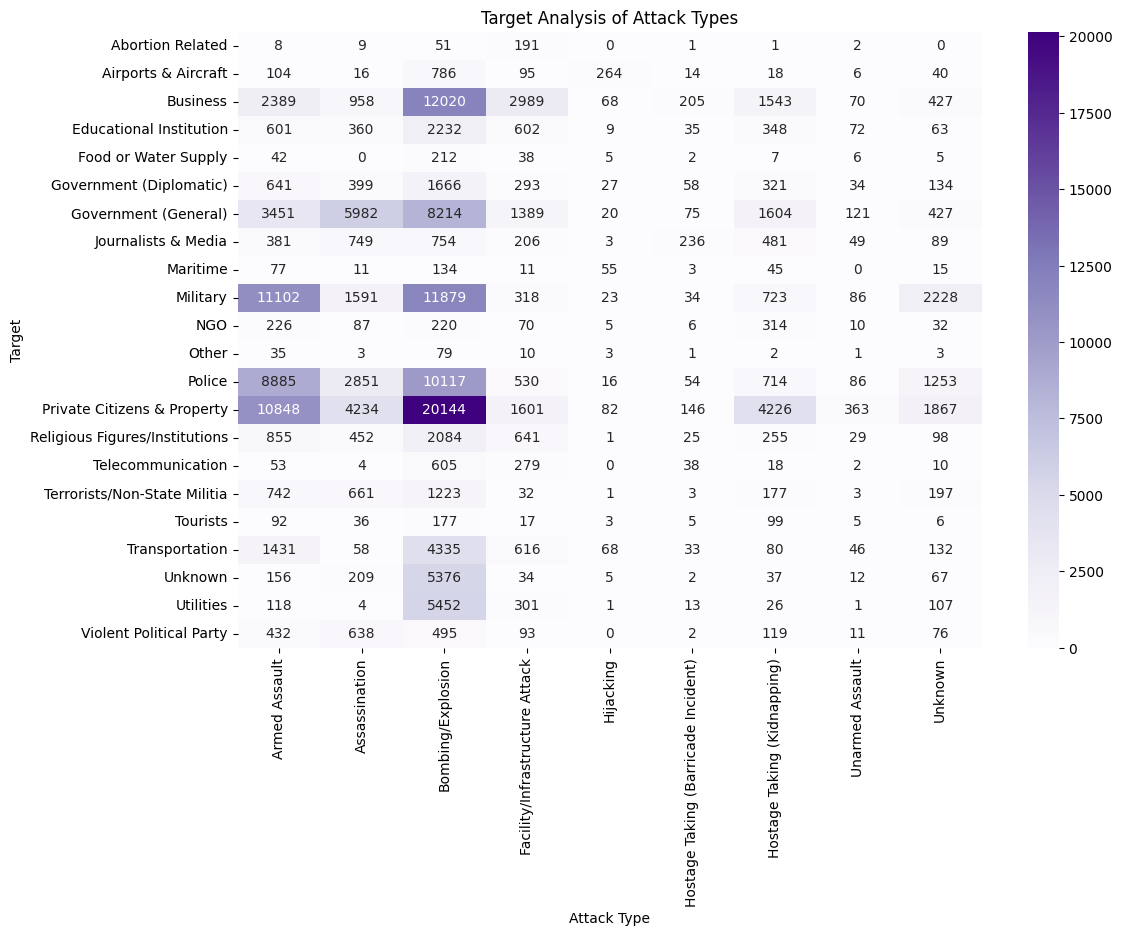

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(target_analysis, annot=True, fmt=".0f", cmap='Purples')
plt.title('Target Analysis of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Target')
plt.show()

In [56]:
arget_filtered = terror[(terror['iyear'] >= 2014) & (terror['region_txt'] == 'South Asia')]
target_filtered = target_filtered[(target_filtered['targtype1_txt'] == 'Private Citizens & Property')]
aggregated_df = target_filtered.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

# # Normalize weights (optional)
aggregated_df['normalized_weight'] = (aggregated_df['incident_count'] - aggregated_df['incident_count'].min()) / \
                                (aggregated_df['incident_count'].max() - aggregated_df['incident_count'].min())

# Prepare heat_data
heat_data = aggregated_df[['latitude', 'longitude', 'normalized_weight']].values.tolist()

# Create a base map
mapa = folium.Map(location=[30, 40], zoom_start=4)

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
mapa.save('terrorism_heatmap.html')

In [57]:
mapa